In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

In [2]:
# loading the file and store the data as a dataframe
df = pd.read_csv("D:/HP-Spectre-Backup/CDrive/Deepu/NPower-JDA/Course/Tech Session/Activity/Python/world_population.csv")

In [3]:
# displaying the first 5 values of the data frame
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
# displaying the last 5 values of the data frame
df.tail()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


In [54]:
# checking for the duplicates
df.duplicated().sum()

0

In [5]:
# checking for the missing values and null values 
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [6]:
# checking the data types of each column 
df.dtypes

Rank                             int64
CCA3                            object
Country/Territory               object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

In [7]:
# identifying the shape of the data frame
df.shape

(234, 17)

In [8]:
# displaying the summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [9]:
# checking the summary of the statistics for numerical columns in the data frame
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [10]:
# displaying the data frame in sorted order by Rank in ascending
df.sort_values(by='Rank')

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,230,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.0392,0.9939,0.00
64,231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.00
150,232,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.4385,0.9985,0.00
209,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.00


In [11]:
# displaying the data frame in sorted order by Rank in descending
df.sort_values(by='Rank', ascending=False)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
226,234,VAT,Vatican City,Vatican City,Europe,510,520,564,596,651,700,733,752,1,510.0000,0.9980,0.00
209,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.00
150,232,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.4385,0.9985,0.00
64,231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.00
137,230,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.0392,0.9939,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77


In [12]:
# setting index as Country
df.set_index('Country/Territory', inplace=True)
df.head()

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country/Territory,,,,,,,,,,,,,,,,
Afghanistan,36,AFG,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
Albania,138,ALB,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
Algeria,34,DZA,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
American Samoa,213,ASM,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
Andorra,203,AND,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [13]:
# displaying the index
df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uzbekistan', 'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Territory', length=234)

In [14]:
# displaying the columns
df.columns

Index(['Rank', 'CCA3', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [15]:
# replacing the column names
df.rename(columns={
    '1970 Population': '1970',
    '1980 Population': '1980',
    '1990 Population': '1990',
    '2000 Population': '2000',
    '2010 Population': '2010',
    '2015 Population': '2015',
    '2020 Population': '2020',
    '2022 Population': '2022'
}, inplace=True)

In [16]:
# displaying the columns
df.columns

Index(['Rank', 'CCA3', 'Capital', 'Continent', '2022', '2020', '2015', '2010',
       '2000', '1990', '1980', '1970', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [17]:
# calculating the Total population overall the years
col_year = ['1970', '1980','1990','2000', '2010','2015','2020','2022']
col_year = [col for col in col_year if col in df.columns]
df['Total'] = df[col_year].sum(axis=1)
df['Total']

Country/Territory
Afghanistan          195521552
Albania               23248519
Algeria              252582377
American Samoa          362688
Andorra                 475926
                       ...    
Wallis and Futuna        97420
Western Sahara         2679204
Yemen                167293517
Zambia                96565352
Zimbabwe              93186324
Name: Total, Length: 234, dtype: int64

In [18]:
df.head()

,Rank,CCA3,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Total
Country/Territory,,,,,,,,,,,,,,,,,
Afghanistan,36,AFG,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,195521552
Albania,138,ALB,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,23248519
Algeria,34,DZA,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,252582377
American Samoa,213,ASM,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,362688
Andorra,203,AND,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,475926


In [23]:
# creating a data frame top_5_df that has countries with top 5 highest population
top_5_df = df.sort_values(by='Total', ascending=False).head(5)
top_5_df

,Rank,CCA3,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Total
Country/Territory,,,,,,,,,,,,,,,,,
China,1,CHN,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,9815434171
India,2,IND,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,8561455951
United States,3,USA,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24,2263973125
Indonesia,4,IDN,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45,1710105237
Brazil,7,BRA,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70,1375289923


In [24]:
top_5_df.index

Index(['China', 'India', 'United States', 'Indonesia', 'Brazil'], dtype='object', name='Country/Territory')

In [26]:
countries = ['China', 'India', 'United States', 'Indonesia', 'Brazil']
years = ['1970', '1980','1990','2000', '2010','2015','2020','2022']

In [27]:
# Use .loc[] to select specific rows and columns
top_5_df = df.loc[countries, years]
top_5_df

,1970,1980,1990,2000,2010,2015,2020,2022
Country/Territory,,,,,,,,
China,822534450,982372466,1153704252,1264099069,1348191368,1393715448,1424929781,1425887337
India,557501301,696828385,870452165,1059633675,1240613620,1322866505,1396387127,1417173173
United States,200328340,223140018,248083732,282398554,311182845,324607776,335942003,338289857
Indonesia,115228394,148177096,182159874,214072421,244016173,259091970,271857970,275501339
Brazil,96369875,122288383,150706446,175873720,196353492,205188205,213196304,215313498


In [28]:
# Transpose the DataFrame
top_5_T = top_5_df.T
top_5_T

Country/Territory,China,India,United States,Indonesia,Brazil
1970,822534450,557501301,200328340,115228394,96369875
1980,982372466,696828385,223140018,148177096,122288383
1990,1153704252,870452165,248083732,182159874,150706446
2000,1264099069,1059633675,282398554,214072421,175873720
2010,1348191368,1240613620,311182845,244016173,196353492
2015,1393715448,1322866505,324607776,259091970,205188205
2020,1424929781,1396387127,335942003,271857970,213196304
2022,1425887337,1417173173,338289857,275501339,215313498


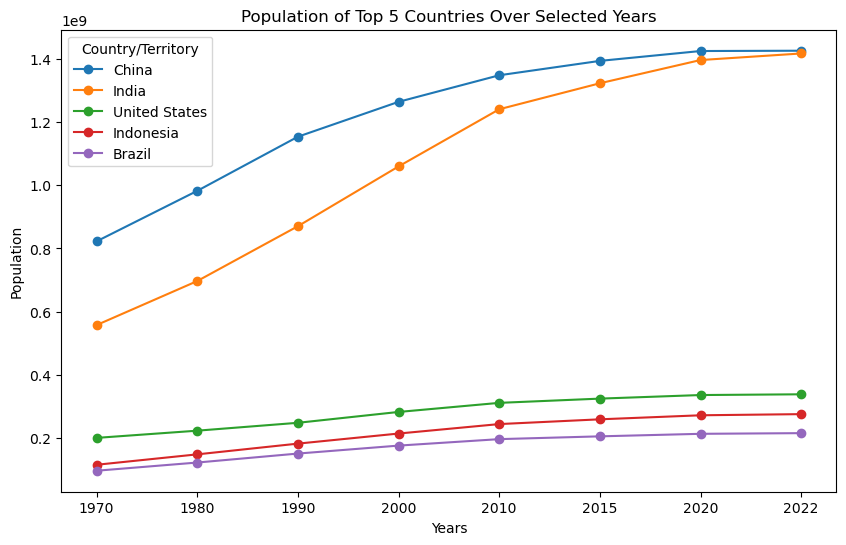

In [29]:
# line plot
plt.figure(figsize=(10, 6))

for country in top_5_T.columns:
    plt.plot(top_5_T.index, top_5_T[country], marker='o', label=country)

plt.title('Population of Top 5 Countries Over Selected Years')
plt.xlabel('Years')
plt.ylabel('Population')
plt.legend(title='Country/Territory')
plt.show()

The line graph shows the growth in population for the top 5 countries over the decades. 
The population has definitely increased significantly from 1970 to 2022 for all countries shown. 
China & India are leading in terms of population growth. 
For China and India, the population has approximately doubled over the period from 1970 to 2022
           1970         2022
China      822.5 M      1.43 B
India      557.5 M      1.42 B

In [44]:
# creating a data frame top_5_df that has countries with top 5 highest population
least_5_df = df.sort_values(by='Total').head(5)
least_5_df

,Rank,CCA3,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Total
Country/Territory,,,,,,,,,,,,,,,,,
Vatican City,234,VAT,Vatican City,Europe,510,520,564,596,651,700,733,752,1,510.0000,0.9980,0.0,5026
Tokelau,233,TKL,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.0,13215
Niue,232,NIU,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.4385,0.9985,0.0,20964
Falkland Islands,231,FLK,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.0,24048
Saint Pierre and Miquelon,229,SPM,Saint-Pierre,North America,5862,5906,5978,6052,6274,6324,6106,5537,242,24.2231,0.9964,0.0,48039


In [45]:
least_5_df.index

Index(['Vatican City', 'Tokelau', 'Niue', 'Falkland Islands',
       'Saint Pierre and Miquelon'],
      dtype='object', name='Country/Territory')

In [46]:
countries = ['Vatican City', 'Tokelau', 'Niue', 'Falkland Islands', 'Saint Pierre and Miquelon']
years = ['1970', '1980','1990','2000', '2010','2015','2020','2022']

In [47]:
# Use .loc[] to select specific rows and columns
least_5_df = df.loc[countries, years]
least_5_df

,1970,1980,1990,2000,2010,2015,2020,2022
Country/Territory,,,,,,,,
Vatican City,752,733,700,651,596,564,520,510
Tokelau,1714,1647,1669,1666,1367,1454,1827,1871
Niue,5185,3637,2533,2074,1812,1847,1942,1934
Falkland Islands,2274,2240,2332,3080,3187,3408,3747,3780
Saint Pierre and Miquelon,5537,6106,6324,6274,6052,5978,5906,5862


In [48]:
# Transpose the DataFrame
least_5_T = least_5_df.T
least_5_T

Country/Territory,Vatican City,Tokelau,Niue,Falkland Islands,Saint Pierre and Miquelon
1970,752,1714,5185,2274,5537
1980,733,1647,3637,2240,6106
1990,700,1669,2533,2332,6324
2000,651,1666,2074,3080,6274
2010,596,1367,1812,3187,6052
2015,564,1454,1847,3408,5978
2020,520,1827,1942,3747,5906
2022,510,1871,1934,3780,5862


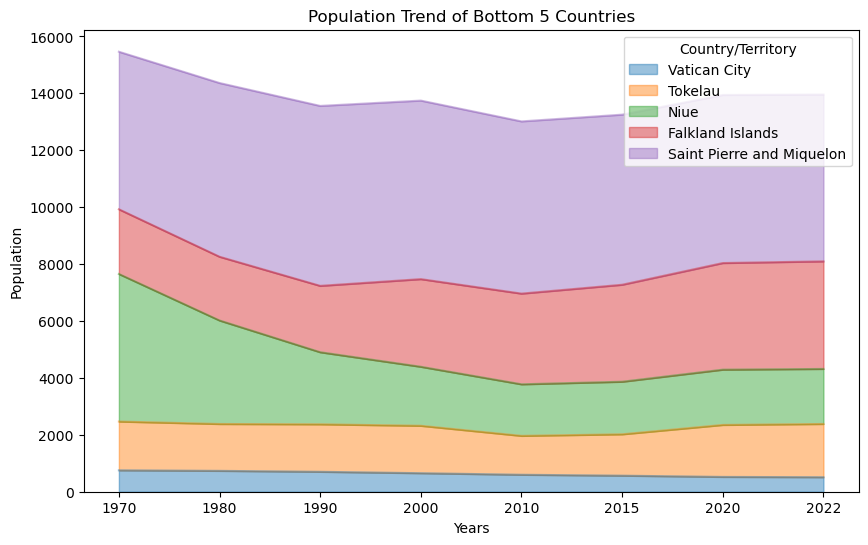

In [52]:
# stacked area plot

least_5_T.plot(kind='area', alpha=0.45, figsize=(10, 6))  # pass a tuple (x, y) size

plt.title('Population Trend of Bottom 5 Countries')
plt.ylabel('Population')
plt.xlabel('Years')

plt.show()

The stacked area plot is used to visualize the population trends over time for the least 5 countries/territories. This plot type helps in understanding how each country’s population contributes to the total population of these five countries over the years. The areas of the stacked plot indicate how each country’s population contributes to the total.There is a general trend of population decline over the decades. Vatican City and Tokelau show a notable decrease in population from 1970 to 2022. The decreasing trend in Vatican City and Niue contrasts with the relatively stable or slightly increasing trends in Tokelau, the Falkland Islands, and Saint Pierre and Miquelon

In [31]:
# taking countries 'Belgium', 'France', 'Spain' and overall years population
df.loc[['Belgium', 'France', 'Spain'], years]

,1970,1980,1990,2000,2010,2015,2020,2022
Country/Territory,,,,,,,,
Belgium,9629376,9828986,9959560,10264343,10877947,11248303,11561717,11655930
France,50523586,53713830,56412897,58665453,62444567,63809769,64480053,64626628
Spain,33792617,37491666,38889889,40741651,46572772,46431342,47363807,47558630


In [32]:
# converting it as a dataframe
df_BFS = df.loc[['Belgium', 'France', 'Spain'], years].transpose()
df_BFS

Country/Territory,Belgium,France,Spain
1970,9629376,50523586,33792617
1980,9828986,53713830,37491666
1990,9959560,56412897,38889889
2000,10264343,58665453,40741651
2010,10877947,62444567,46572772
2015,11248303,63809769,46431342
2020,11561717,64480053,47363807
2022,11655930,64626628,47558630


In [33]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_BFS, 10)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[8 0 0 0 1 3 4 1 3 4]
[ 9629376.  15129101.2 20628826.4 26128551.6 31628276.8 37128002.
 42627727.2 48127452.4 53627177.6 59126902.8 64626628. ]


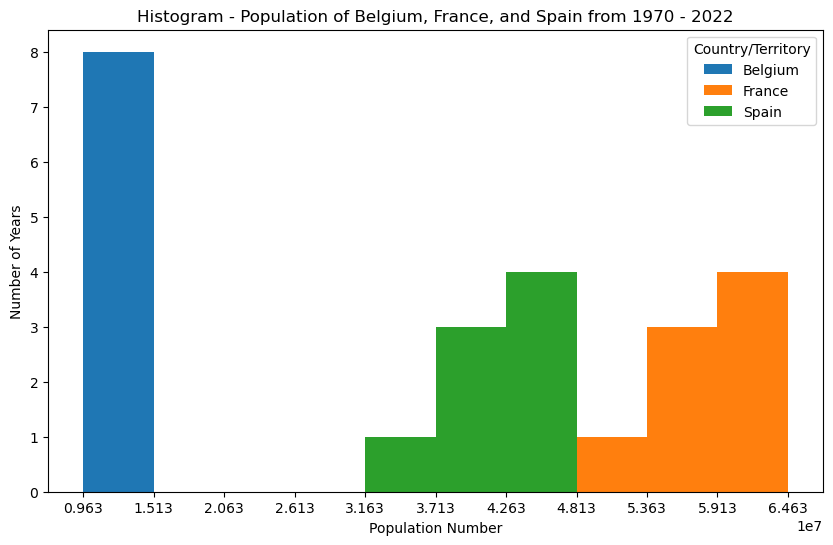

In [29]:
# generate histogram

df_BFS.plot(kind='hist', figsize=(10, 6), bins=10, xticks=bin_edges)

plt.title('Histogram - Population of Belgium, France, and Spain from 1970 - 2022')
plt.ylabel('Number of Years')
plt.xlabel('Population Number')

plt.show()

The histogram shows the distribution of population sizes for Belgium, France, and Spain from 1970 to 2022
x-axis represents the range of population numbers, divided into bins, 
y-axis indicates the frequency of years that fall within each population range
The histogram highlights the most common population ranges for the selected countries. 
Peaks in the histogram indicate population ranges that occurred more frequently across the years.
There were 8 years where the population fell between 9.63 M and 15.13 M for Belgium
1 year had a population in the range of 31.62 M to 37.12 M - Spain
4 years had populations in the range of 42.62 M to 48.12 M - Spain
1 year had a population in the range of 48.13 M to 52.63 M - France
4 years had populations in the range of 59.13 M to 64.63 M - France

In [35]:
# creating a dataframe that has the only one country with least population 
df_least_1 = df.sort_values(by='Rank', ascending=False).head(1)
df_least_1

,Rank,CCA3,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Total
Country/Territory,,,,,,,,,,,,,,,,,
Vatican City,234,VAT,Vatican City,Europe,510,520,564,596,651,700,733,752,1,510.0,0.998,0.0,5026


In [36]:
df_least_1.index

Index(['Vatican City'], dtype='object', name='Country/Territory')

In [37]:
smallest_country = ['Vatican City']
years = ['1970', '1980','1990','2000', '2010','2015','2020','2022']

In [38]:
# converting it as a dataframe
least_1_df = df.loc[smallest_country, years]
least_1_df

,1970,1980,1990,2000,2010,2015,2020,2022
Country/Territory,,,,,,,,
Vatican City,752,733,700,651,596,564,520,510


In [39]:
# transpose the dataframe
least_1_df_T = least_1_df.transpose()
least_1_df_T

Country/Territory,Vatican City
1970,752
1980,733
1990,700
2000,651
2010,596
2015,564
2020,520
2022,510


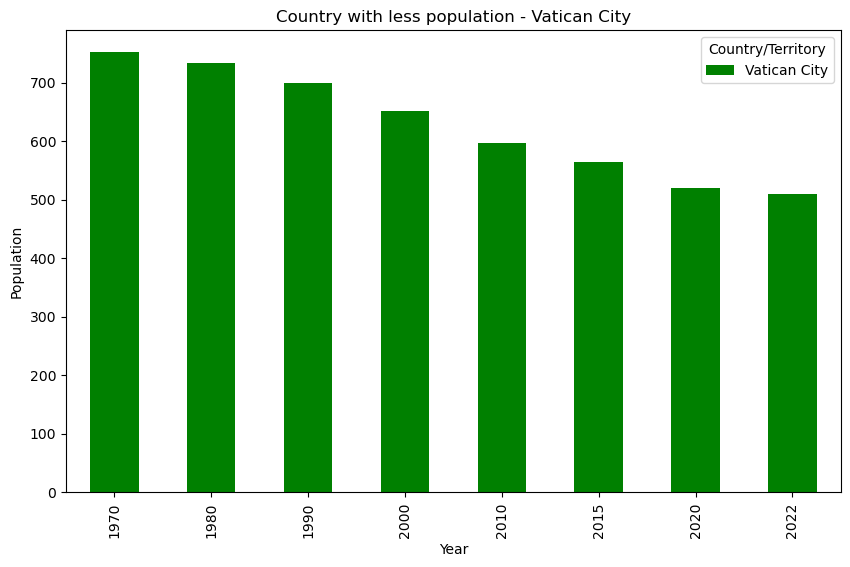

In [40]:
# plotting the bar plot
least_1_df_T.plot(kind='bar', figsize=(10, 6), color='green')

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Country with less population - Vatican City') # add title to the plot

plt.show()

The bar plot illustrates the population trend of Vatican City from 1970 to 2022.
The data clearly shows a consistent decline in Vatican City's population over the years. From 752 people in 1970, the population decreased to 510 by 2022. This represents a decrease of approximately 32% over the 52-year period.
For instance, there was a significant drop from 733 in 1980 to 700 in 1990, and another notable decrease from 651 in 2000 to 596 in 2010

In [41]:
df.head()

,Rank,CCA3,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Total
Country/Territory,,,,,,,,,,,,,,,,,
Afghanistan,36,AFG,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,195521552
Albania,138,ALB,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,23248519
Algeria,34,DZA,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,252582377
American Samoa,213,ASM,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,362688
Andorra,203,AND,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,475926


In [42]:
# creating a dataframe by grouping it with Continent 
df_continent = df.groupby('Continent', axis=0).sum()
df_continent

C:\Users\surya\AppData\Local\Temp\ipykernel_11676\457970206.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continent = df.groupby('Continent', axis=0).sum()


,Rank,CCA3,Capital,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Total
Continent,,,,,,,,,,,,,,,,
Africa,5253,DZAAGOBENBWABFABDICMRCPVCAFTCDCOMDJICODEGYGNQE...,AlgiersLuandaPorto-NovoGaboroneOuagadougouBuju...,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348,30317963,7127.7158,58.2109,17.87,7347810642
Asia,3878,AFGARMAZEBHRBGDBTNBRNKHMCHNGEOHKGINDIDNIRNIRQI...,KabulYerevanBakuManamaDhakaThimphuBandar Seri ...,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290,32138141,51251.2068,50.4692,59.19,29788655017
Europe,6225,ALBANDAUTBLRBELBIHBGRHRVCYPCZEDNKESTFROFINFRAD...,TiranaAndorra la VellaViennaMinskBrusselsSaraj...,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991,23010411,33166.2371,50.1128,9.33,5760954646
North America,6437,AIAATGABWBHSBRBBLZBMUVGBCANCYMCRICUBCUWDMADOMS...,The ValleySaint John’sOranjestadNassauBridgeto...,600296136,594236593,570383850,542720651,486069584,421266425,368293361,315434606,24244178,10910.4703,40.1670,7.51,3898701206
Oceania,4336,ASMAUSCOKFJIPYFGUMKIRMHLFSMNRUNCLNZLNIUNFKPLWP...,Pago PagoCanberraAvaruaSuvaPapeeteHagåtñaTaraw...,45038554,43933426,40403283,37102764,31222778,26743822,22920240,19480270,8515081,3048.4905,23.1698,0.55,266845137
South America,1366,ARGBOLBRACHLCOLECUFLKGUFGUYPRYPERSURURYVEN,Buenos AiresSucreBrasiliaSantiagoBogotaQuitoSt...,436816608,431530043,413134396,393078250,349634282,297146415,241789006,192947156,17833382,293.6077,14.1114,5.48,2756076156


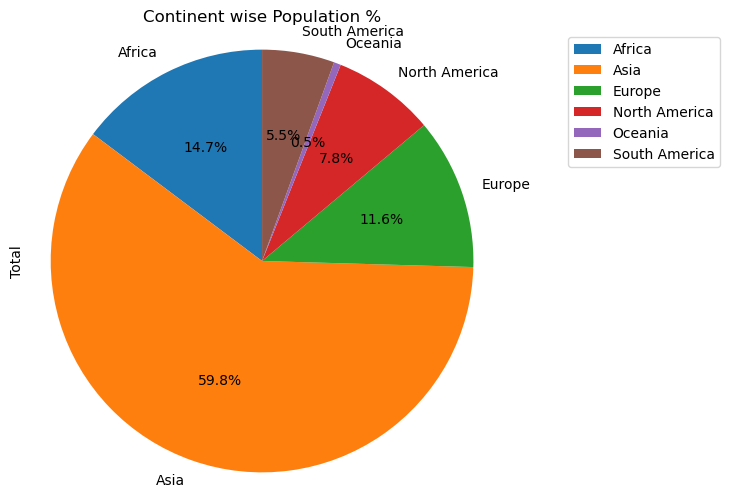

In [38]:
# pie chart
df_continent['Total'].plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90)


plt.title('Continent wise Population %')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_continent.index, loc='upper right', bbox_to_anchor=(1.5, 1.0)) 


plt.show()

The pie chart shows the visual representation of the proportion of the world's population across different continents.
Asia has the largest share of the global population by a significant margin, contributing approximately 59.8% of the world's total population. This underscores Asia's status as the most populous continent, driven by highly populous countries such as China and India
Africa's population also represents a substantial portion, making up about 14.7% of the global population, indicates the significant population growth relative to others
Europe and North America have smaller shares of the global population compared to Asia and Africa, with Europe at 11.6% and North America at 7.8%. This reflects lower population densities and slower growth rates in these regions
South America and Oceania contribute the smallest shares of global population, at 5.5% and 0.5%, respectively, relatively smaller population compared to other continents

In [39]:
# creating a dataframe with 'China', 'India', overall years population
df_CI = df.loc[['China', 'India'], years].transpose()
df_CI 

Country/Territory,China,India
1970,822534450,557501301
1980,982372466,696828385
1990,1153704252,870452165
2000,1264099069,1059633675
2010,1348191368,1240613620
2015,1393715448,1322866505
2020,1424929781,1396387127
2022,1425887337,1417173173


In [40]:
df_CI.describe()

Country/Territory,China,India
count,8.000000e+00,8.000000e+00
mean,1.226929e+09,1.070182e+09
std,2.240527e+08,3.299235e+08
min,8.225344e+08,5.575013e+08
25%,1.110871e+09,8.270462e+08
50%,1.306145e+09,1.150124e+09
75%,1.401519e+09,1.341247e+09
max,1.425887e+09,1.417173e+09


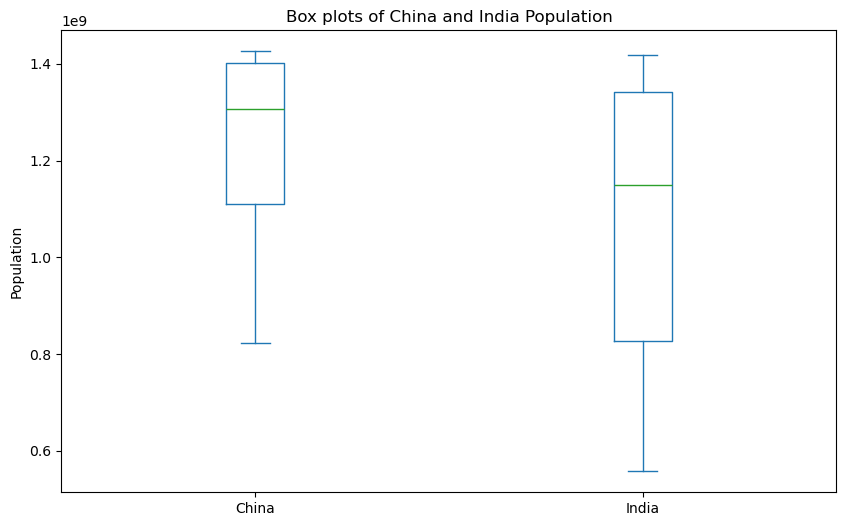

In [41]:
# box plot 
df_CI.plot(kind='box', figsize=(10, 6))

plt.ylabel('Population')
plt.title('Box plots of China and India Population')
plt.show()

The box plot compares the population distributions of China and India over the specified years
The box plot shows that China has a higher median population compared to India. The median for China is around 1.31 billion, while for India it's approximately 1.15 billion. This indicates that China's population has been generally higher over the years compared to India
The median population for India is significantly lower but shows a high rate of growth, as reflected by its higher range and spread.
While China’s population has been relatively more stable, India's population has seen more growth over the years. The increasing spread of India’s data points is a reflection of its accelerating population growth compared to China

In [42]:
# creating a data frame for top 25 countries by area wise
df_top_10_by_area = df.sort_values(by='Area (km²)', ascending=False).head(10)
df_top_10_by_area

,Rank,CCA3,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Total
Country/Territory,,,,,,,,,,,,,,,,,
Russia,9,RUS,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81,1141442604
Canada,39,CAN,Ottawa,North America,38454327,37888705,35732126,33963412,30683313,27657204,24511510,21434577,9984670,3.8513,1.0078,0.48,250325174
China,1,CHN,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,9815434171
United States,3,USA,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24,2263973125
Brazil,7,BRA,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70,1375289923
Australia,55,AUS,Canberra,Oceania,26177413,25670051,23820236,22019168,19017963,17048003,14706322,12595034,7692024,3.4032,1.0099,0.33,161054190
India,2,IND,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,8561455951
Argentina,33,ARG,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57,296479575
Kazakhstan,66,KAZ,Nursultan,Asia,19397998,18979243,17835909,16627837,15236253,16866563,14172710,12265305,2724900,7.1188,1.0105,0.24,131381818


In [43]:
df_top_10_by_area['Area (km²)'].describe()

count    1.000000e+01
mean     7.354490e+06
std      4.673225e+06
min      2.381741e+06
25%      2.907198e+06
50%      8.103896e+06
75%      9.623373e+06
max      1.709824e+07
Name: Area (km²), dtype: float64

In [44]:
df_top_10_by_area['2022'].describe()

count    1.000000e+01
mean     3.715820e+08
std      5.626497e+08
min      1.939800e+07
25%      4.006655e+07
50%      9.511182e+07
75%      3.075458e+08
max      1.425887e+09
Name: 2022, dtype: float64

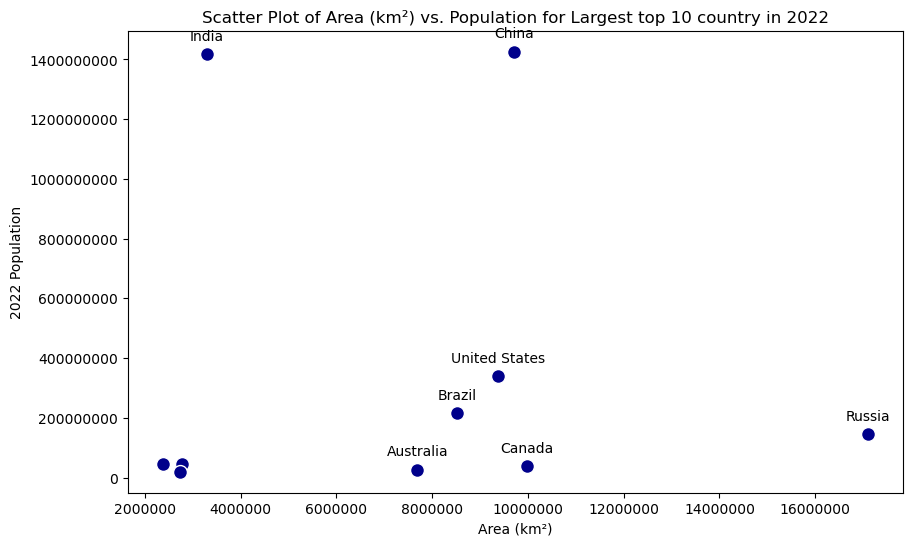

In [45]:
# scatter plot
df_top_10_by_area.plot(kind='scatter', x='Area (km²)', y='2022', figsize=(10, 6), edgecolors='w', color='darkblue', s=100)
plt.title('Scatter Plot of Area (km²) vs. Population for Largest top 10 country in 2022')
plt.xlabel('Area (km²)')
plt.ylabel('2022 Population')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

# Iterate through the data points and annotate
for i, row in df_top_10_by_area.iterrows():
    if not (0 <= row['Area (km²)'] <= 4000000 and 0 <= row['2022'] <= 200000000):
        plt.annotate(i, (row['Area (km²)'], row['2022']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()



The scatter plot compares the area of the top 10 largest countries by land area with their respective populations in year 2022

The scatter plot shows that there isn't a strong, clear correlation between a country’s land area and its population. Countries with large areas do not necessarily have proportionally large populations. For example, Russia, the largest country by area, does not have the largest population, which is true for several other large countries like Canada and Australia.

China and India stand out with very high populations despite their relatively large areas. They lie at the top-right corner of the plot (can be considered as outliers), indicating that they have both a large land area and a high population

Conversely, countries like Canada, Australia, and Russia have vast areas but comparatively lower populations. These countries are located in the bottom-right of the plot

In [46]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['Years', 'Total']

# view the final dataframe
df_tot

,Years,Total
0,1970,3694136661
1,1980,4442400371
2,1990,5314191665
3,2000,6147055703
4,2010,6983784998
5,2015,7424809761
6,2020,7839250603
7,2022,7973413042


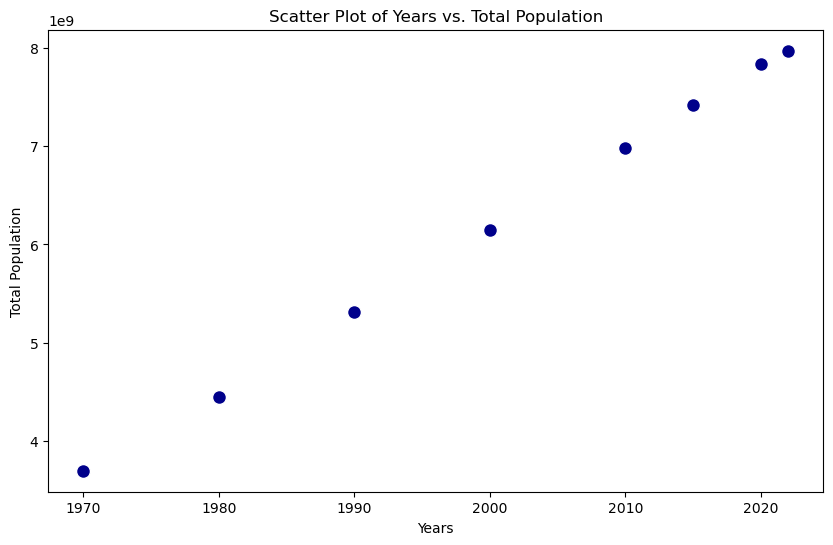

In [47]:
# scatter plot
df_tot.plot(kind='scatter', x='Years', y='Total', figsize=(10, 6), edgecolors='w', color='darkblue', s=100)
plt.title('Scatter Plot of Years vs. Total Population')
plt.xlabel('Years')
plt.ylabel('Total Population')

plt.show()

The scatter plot shows the relationship between years and the total global population.
It reveals a clear upward trend in global population over the years. Each data point indicates an increase in the total population, reflecting consistent global growth
In 2010 the population was 6.98 B, if you see 2022 it's 7.97 B, it's almost 1B increase 


In [48]:
# transposed dataframe
df_t = df[years].transpose()
df_t

Country/Territory,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
1970,10752971,2324731,13795915,27075,19860,6029700,6283,64516,23842803,2534377,...,12011361,87019,752,11355475,41928849,9377,76371,6843607,4281671,5202918
1980,12486631,2941651,18739378,32886,35611,8330047,6560,64888,28024803,3135123,...,15947129,118156,733,15210443,52968270,11315,116775,9204938,5720438,7049926
1990,10694796,3295066,25518074,47818,53569,11828638,8316,63328,32637657,3556539,...,20579100,150882,700,19750579,66912613,13454,178529,13375121,7686401,10113893
2000,19542982,3182021,30774621,58230,66097,16394062,11047,75055,37070774,3168523,...,24925554,192074,651,24427729,79001142,14723,270375,18628700,9891136,11834676
2010,28189672,2913399,35856344,54849,71519,23364185,13172,85695,41100123,2946293,...,28614227,245453,596,28715022,87411012,13142,413296,24743946,13792086,12839771
2015,33753499,2882481,39543154,51368,71746,28127721,14525,89941,43257065,2878595,...,30949417,276438,564,30529716,92191398,12182,491824,28516545,16248230,14154937
2020,38972230,2866849,43451666,46189,77700,33428485,15585,92664,45036032,2805608,...,33526656,311685,520,28490453,96648685,11655,556048,32284046,18927715,15669666
2022,41128771,2842321,44903225,44273,79824,35588987,15857,93763,45510318,2780469,...,34627652,326740,510,28301696,98186856,11572,575986,33696614,20017675,16320537


In [49]:
# transposed dataframe
df_t = df[years].transpose()

# cast the Years (the index) to type int
df_t.index = map(int, df_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_t.reset_index(inplace=True)

# view the changes
df_t

Country/Territory,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,1970,10752971,2324731,13795915,27075,19860,6029700,6283,64516,23842803,...,12011361,87019,752,11355475,41928849,9377,76371,6843607,4281671,5202918
1,1980,12486631,2941651,18739378,32886,35611,8330047,6560,64888,28024803,...,15947129,118156,733,15210443,52968270,11315,116775,9204938,5720438,7049926
2,1990,10694796,3295066,25518074,47818,53569,11828638,8316,63328,32637657,...,20579100,150882,700,19750579,66912613,13454,178529,13375121,7686401,10113893
3,2000,19542982,3182021,30774621,58230,66097,16394062,11047,75055,37070774,...,24925554,192074,651,24427729,79001142,14723,270375,18628700,9891136,11834676
4,2010,28189672,2913399,35856344,54849,71519,23364185,13172,85695,41100123,...,28614227,245453,596,28715022,87411012,13142,413296,24743946,13792086,12839771
5,2015,33753499,2882481,39543154,51368,71746,28127721,14525,89941,43257065,...,30949417,276438,564,30529716,92191398,12182,491824,28516545,16248230,14154937
6,2020,38972230,2866849,43451666,46189,77700,33428485,15585,92664,45036032,...,33526656,311685,520,28490453,96648685,11655,556048,32284046,18927715,15669666
7,2022,41128771,2842321,44903225,44273,79824,35588987,15857,93763,45510318,...,34627652,326740,510,28301696,98186856,11572,575986,33696614,20017675,16320537


In [50]:
# normalize Italy data
norm_Italy = (df_t['Italy'] - df_t['Italy'].min()) / (df_t['Italy'].max() - df_t['Italy'].min())

# normalize Canada data
norm_Canada = (df_t['Canada'] - df_t['Canada'].min()) / (df_t['Canada'].max() - df_t['Canada'].min())

In [51]:
norm_Italy

0    0.000000
1    0.435013
2    0.496829
3    0.527201
4    0.940590
5    1.000000
6    0.894002
7    0.826971
Name: Italy, dtype: float64

In [52]:
norm_Canada

0    0.000000
1    0.180786
2    0.365612
3    0.543412
4    0.736135
5    0.840056
6    0.966767
7    1.000000
Name: Canada, dtype: float64

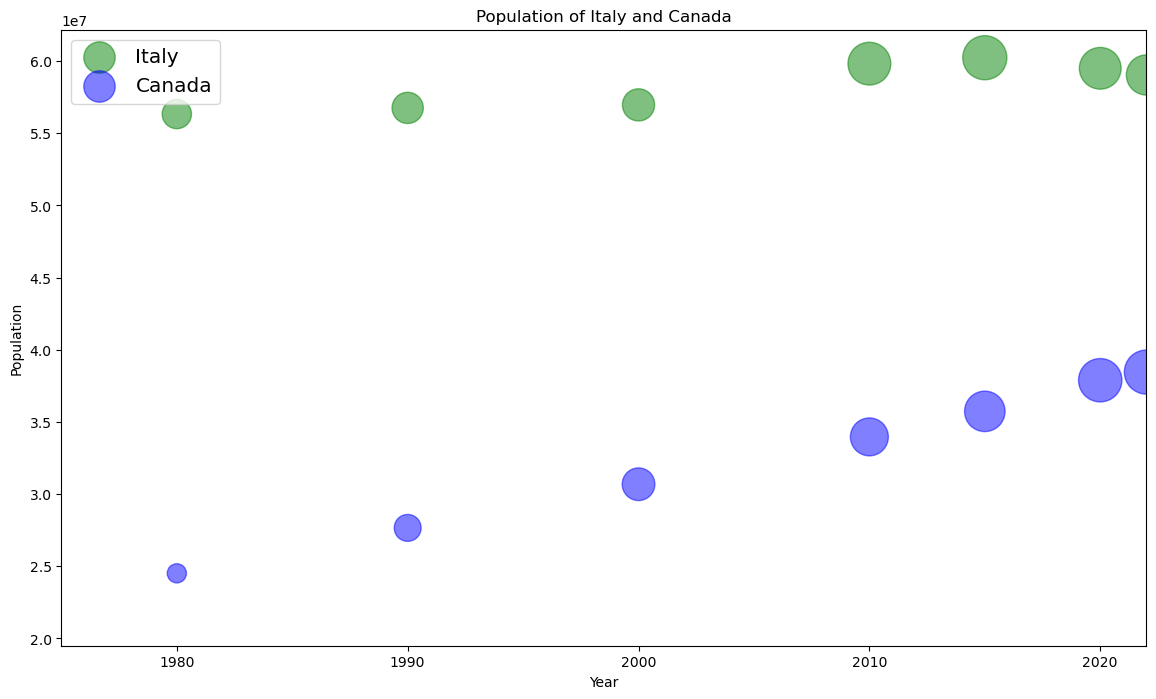

In [53]:
# Italy
ax0 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Italy',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_Italy * 1000 + 10,  # pass in weights 
                    xlim=(1975, 2022)
                    )

# Canada
ax1 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Canada',
                    alpha=0.5,
                    color="blue",
                    s=norm_Canada * 1000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Population')
ax0.set_title('Population of Italy and Canada')
ax0.legend(['Italy', 'Canada'], loc='upper left', fontsize='x-large')

The scatter plot comparing the populations of Italy and Canada provides several insights into how their populations have changed over time.
The population of Italy shows a relatively stable trend with a slight increase over time. The scatter points for Italy are relatively close together, indicating a steadier and slower rate of population increase. 
Canada’s population exhibits a more pronounced upward trend, with significant growth over the decades. The scatter points for Canada are more spread out, reflecting a higher rate of population growth. The larger bubbles for Canada indicate a more significant change in population relative to the normalization

In [54]:
# creating a dataframe with countries 'Turkey', 'Germany', 'Thailand'
df_tgt = df.loc[['Turkey', 'Germany', 'Thailand']]
df_tgt

,Rank,CCA3,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Total
Country/Territory,,,,,,,,,,,,,,,,,
Turkey,18,TUR,Ankara,Asia,85341241,84135428,79646178,73195345,64113547,54324142,44089069,35540990,783562,108.9145,1.0067,1.07,520385940
Germany,19,DEU,Berlin,Europe,83369843,83328988,82073226,81325090,81551677,79370196,77786703,78294583,357114,233.4544,0.9995,1.05,647100306
Thailand,20,THA,Bangkok,Asia,71697030,71475664,70294397,68270489,63066603,55228410,45737753,35791728,513120,139.7276,1.0013,0.90,481562074


In [55]:
# compute the proportion of each category with respect to the total
total_values = df_tgt['Total'].sum()
category_proportions = df_tgt['Total'] / total_values

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country/Territory,
Turkey,0.315567
Germany,0.392408
Thailand,0.292024


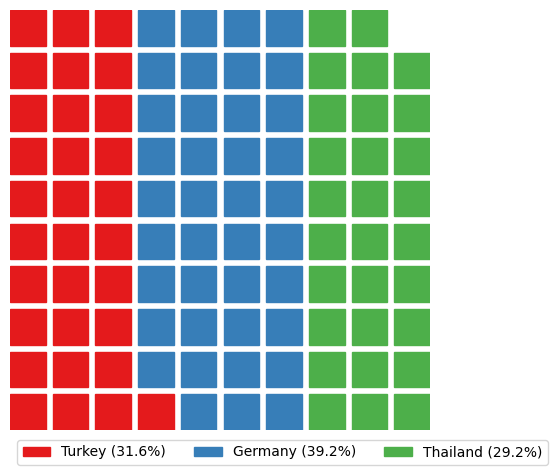

In [56]:
# Convert proportions to the number of cells
proportion_cells = (category_proportions * 100).astype(int)

# Create a dictionary for waffle chart values
waffle_data = proportion_cells.to_dict()

# Set up the Waffle chart figure
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,  # Number of rows for the waffle chart
    columns=10,  # Number of columns for the waffle chart
    values=waffle_data,
    cmap_name='Set1',  # Color scheme
    legend={
        'labels': [f'{country} ({category_proportions[country]:.1%})' for country in category_proportions.index],
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.1),
        'ncol': 3
    }
)

# Display the waffle chart
plt.show()

The Waffle chart shows the visual representation of the proportion of each country’s population relative to the total population of the Turkey, Germany & Thailand.
The Waffle chart shows that Germany has the largest proportion of the total population among Turkey, Germany, and Thailand, accounting for approximately 39.2%.
Turkey and Thailand have proportions of about 31.6% and 29.2%, respectively. The use of a Waffle chart with different color and respective legend makes it easy to compare the population sizes of these countries visually. The number of colored cells represents the percentage of the total population, making it clear which country has a larger share

In [57]:
top_50_df = df.sort_values(by='Total', ascending=False).head(50)
top_50_df

,Rank,CCA3,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Total
Country/Territory,,,,,,,,,,,,,,,,,
China,1,CHN,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,9815434171
India,2,IND,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,8561455951
United States,3,USA,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24,2263973125
Indonesia,4,IDN,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45,1710105237
Brazil,7,BRA,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70,1375289923
Pakistan,5,PAK,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96,1278144321
Russia,9,RUS,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81,1141442604
Nigeria,6,NGA,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74,1118404199
Bangladesh,8,BGD,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15,1032641065


In [58]:
# Create frequency dictionary
frequency_dict = top_50_df['Total'].to_dict()

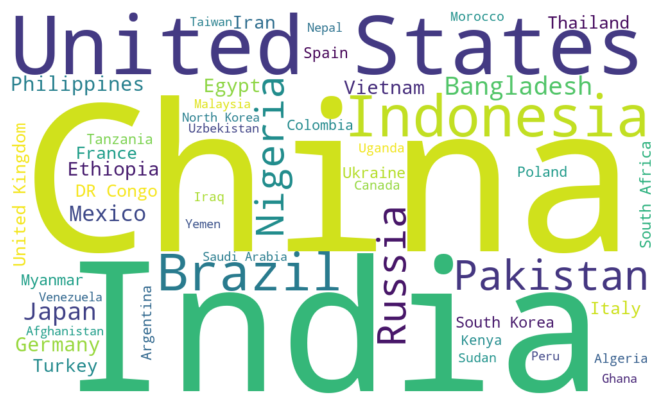

In [59]:
# Generate and display the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(frequency_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes for word cloud
plt.show()

The Word Cloud shows the visual representation of the relative populations of the top 50 most populous countries. Countries with larger populations appear as larger and more prominent words. This makes it immediately clear which countries have the highest populations among the top 50. For example, countries like China, India, and the United States are significantly larger in the Word Cloud, reflecting their massive population sizes.

In [60]:
# creating a data frame by grouping the 2022 population by continent and country
df_treemap = df.groupby(['Continent', 'Country/Territory'])['2022'].sum().reset_index()
df_treemap

,Continent,Country/Territory,2022
0,Africa,Algeria,44903225
1,Africa,Angola,35588987
2,Africa,Benin,13352864
3,Africa,Botswana,2630296
4,Africa,Burkina Faso,22673762
...,...,...,...
229,South America,Paraguay,6780744
230,South America,Peru,34049588
231,South America,Suriname,618040
232,South America,Uruguay,3422794


In [61]:
# Create the Treemap
fig = px.treemap(df_treemap, path=['Continent', 'Country/Territory'], values='2022', title='Treemap of 2022 World Population by Continent and Country/Territory')

# Show the plot
fig.show()

The tree map provides a high-level view of population distribution across continents. Each continent is represented as a large block. Within each continent, individual countries are displayed as smaller blocks, sized proportionally to their population. The size of each block in the tree map represents the population of that country or continent for the year 2022. Larger blocks indicate countries or continents with larger populations, smaller blocks indicate countries or continents with smaller populations. By examining the sizes of the blocks, it is easy identify patterns, such as which continents are more populous and which countries are significant contributors to their continent’s population.
For example, Asia is contributing more to the population, China & India leading with larger population in Asia

In [62]:
# reset the index as a column 
df_map = df.reset_index()


In [63]:
# Create a choropleth map with full-size layout
fig = px.choropleth(
    df_map,
    locations='CCA3',  # ISO 3166-1 alpha-3 country codes
    color='2022',  # Population data
    hover_name='Country/Territory',  # Hover text
    hover_data={'Total': True},  # Ensure 'Total' is shown on hover
    color_continuous_scale='Viridis',  # Color scale
    title='2022 World Population by Country',
    labels={'Total': 'Population'},  # Label for the color bar
    projection='natural earth'  # Map projection
)

# Update the layout to ensure full-size map
fig.update_layout(
    autosize=True,  # Allow figure to automatically adjust size
    height=800,  # Set height of the map (in pixels)
    margin={"r":0,"t":40,"l":0,"b":0},  # Remove margins
    geo=dict(
        showland=True,  # Show land
        landcolor='rgb(243, 243, 243)',  # Land color
        showocean=True,  # Show ocean
        oceancolor='rgb(204, 204, 255)',  # Ocean color
        showlakes=True,  # Show lakes
        lakecolor='rgb(255, 255, 255)',  # Lake color
        showrivers=True,  # Show rivers
        rivercolor='rgb(0, 0, 255)',  # River color
    )
)


# Show the figure (optional if running standalone)
fig.show()

The choropleth map offers a compelling visualization of global population distribution by country for the year 2022. The map uses color intensity to represent population sizes, with darker shades indicating higher populations. This allows for a quick visual assessment of where the largest and smallest populations are concentrated globally. Countries like China and India will stand out with darker colors, reflecting their massive populations. Countries such as the United States, Indonesia, and Brazil will also appear prominently, but with lighter shades compared to China and India. This indicates their large but comparatively smaller populations. Countries with smaller populations will be depicted in lighter shades, such as smaller nations in Oceania, parts of Africa, and some European countries. This highlights their lower contributions to the global population. By hovering over different countries, users can see detailed population figures and other relevant data. This interactivity enhances understanding by providing exact numbers and comparisons directly on the map